#     Startups Funding Analysis

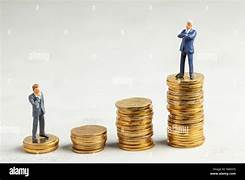
---





# Data Uploading and checking 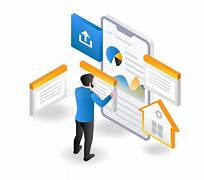

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import gdown

In [ ]:
# Use 'latin1' encoding (commonly resolves the issue)
data = pd.read_csv("/content/investments_VC.csv", encoding="latin1")
print(data.head())

                         permalink                name  \
0            /organization/waywire            #waywire   
1  /organization/tv-communications  &TV Communications   
2    /organization/rock-your-paper   'Rock' Your Paper   
3   /organization/in-touch-network   (In)Touch Network   
4   /organization/r-ranch-and-mine  -R- Ranch and Mine   

                    homepage_url  \
0         http://www.waywire.com   
1          http://enjoyandtv.com   
2   http://www.rockyourpaper.org   
3  http://www.InTouchNetwork.com   
4                            NaN   

                                       category_list        market   \
0         |Entertainment|Politics|Social Media|News|          News    
1                                            |Games|         Games    
2                             |Publishing|Education|    Publishing    
3  |Electronics|Guides|Coffee|Restaurants|Music|i...   Electronics    
4                      |Tourism|Entertainment|Games|       Tourism    

   fund

In [ ]:
data.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0,0,0,0,0,0,0,0,0,0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0,0,0,0,0,0,0,0,0,0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0,0,0,0,0,0,0,0,0,0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0,0,0,0,0,0,0,0,0,0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49438 entries, 0 to 49437
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  int64  
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [ ]:
# Remove Space from columns like " market " & " funding_total_usd "
data.columns = data.columns.str.strip()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49438 entries, 0 to 49437
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4   market                45470 non-null  object 
 5   funding_total_usd     49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  int64  
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

# **Data Cleaning** 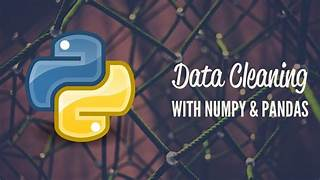

## *Handle Missing Values*

In [ ]:
# Check percentage of missing values
missing_data = data.isnull().mean() * 100
print(missing_data)

permalink                0.000000
name                     0.002023
homepage_url             6.976415
category_list            8.012056
market                   8.026215
funding_total_usd        0.000000
status                   2.657875
country_code            10.665885
state_code              38.992273
region                  10.665885
city                    12.371051
funding_rounds           0.000000
founded_at              22.015454
founded_month           22.161091
founded_quarter         22.161091
founded_year            22.161091
first_funding_at         0.000000
last_funding_at          0.000000
seed                     0.000000
venture                  0.000000
equity_crowdfunding      0.000000
undisclosed              0.000000
convertible_note         0.000000
debt_financing           0.000000
angel                    0.000000
grant                    0.000000
private_equity           0.000000
post_ipo_equity          0.000000
post_ipo_debt            0.000000
secondary_mark

In [ ]:
# Drop rows with missing `market` or `category_list`
data = data.dropna(subset=['category_list'])
data = data.dropna(subset=['market'])

In [ ]:
# Fill missing values in non-critical columns with a placeholder
data['state_code'] = data['state_code'].fillna('Unknown')
data['city'] = data['city'].fillna('Unknown')

## "Cleaning & Checking Duplicates"

In [ ]:
# Remove unwanted characters and convert to numeric
data['funding_total_usd'] = data['funding_total_usd'].replace({'\$': '', ',': ''}, regex=True)
data['funding_total_usd'] = pd.to_numeric(data['funding_total_usd'], errors='coerce')

# Check for invalid or negative values
print(data['funding_total_usd'].describe())

count    3.839900e+04
mean     1.628599e+07
std      1.710386e+08
min      1.000000e+00
25%      4.000000e+05
50%      2.100000e+06
75%      1.000000e+07
max      3.007950e+10
Name: funding_total_usd, dtype: float64


In [ ]:
# Check for Duplicates
# Drop duplicate rows based on key columns (e.g., 'permalink')
data = data.drop_duplicates(subset=['permalink'])

In [ ]:
# Convert columns to datetime
data['founded_at'] = pd.to_datetime(data['founded_at'], errors='coerce')
data['first_funding_at'] = pd.to_datetime(data['first_funding_at'], errors='coerce')
data['last_funding_at'] = pd.to_datetime(data['last_funding_at'], errors='coerce')

# Extract additional date information if needed
data['founded_year'] = data['founded_at'].dt.year

<ipython-input-23-cee922cd43ed>:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['first_funding_at'] = pd.to_datetime(data['first_funding_at'], errors='coerce')
<ipython-input-23-cee922cd43ed>:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['last_funding_at'] = pd.to_datetime(data['last_funding_at'], errors='coerce')


# **Data Transformation** 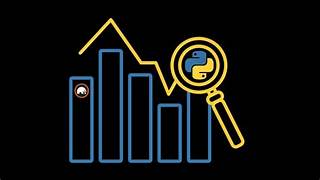

## *Aggregate Funding Rounds*

In [ ]:
# Create a column to represent the total funding rounds by summing individual rounds.

funding_rounds_cols = [
    'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
    'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
    'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
    'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'
]

# Create a total funding rounds column
data['total_funding_rounds'] = data[funding_rounds_cols].sum(axis=1)

## *Group Data by Category, Region, or Status*


In [ ]:
# Aggregate funding by category
category_funding = data.groupby('category_list')['funding_total_usd'].sum().sort_values(ascending=False)

# Aggregate funding by region
region_funding = data.groupby('country_code')['funding_total_usd'].sum().sort_values(ascending=False)

# Aggregate funding by startup status
status_funding = data.groupby('status')['funding_total_usd'].sum()

# Aggregate funding by Companies
Companies_funding = data.groupby('name')['funding_total_usd'].sum().sort_values(ascending=False)

# Aggregate funding by Markets
Markets_funding = data.groupby('market')['funding_total_usd'].sum().sort_values(ascending=False)


# **Exploratory Data Analysis (EDA)** 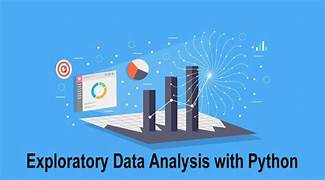

## *Analyze Funding Distribution*

In [ ]:
# Group by country and sector, then aggregate funding
sector_analysis = data.groupby(['country_code', 'market'])['funding_total_usd'].sum().reset_index()

# Top sectors for each country
top_sectors_by_country = sector_analysis.sort_values(['country_code', 'funding_total_usd'], ascending=[True, False])

# Top 5 startups in each country by sector
top_startups = data.groupby(['country_code', 'market', 'name'])['funding_total_usd'].sum().reset_index()
top_startups_sorted = top_startups.sort_values(['country_code', 'market', 'funding_total_usd'], ascending=[True, True, False])

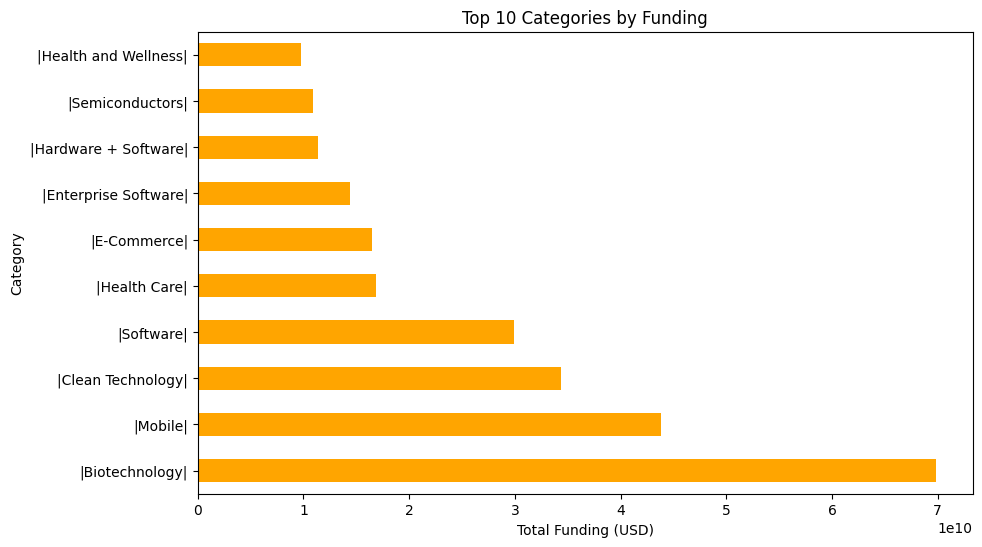

In [ ]:
# Top 10 categories by funding

category_funding.head(10).plot(kind='barh', title="Top 10 Categories by Funding", figsize=(10, 6),color="orange")
plt.xlabel("Total Funding (USD)")
plt.ylabel("Category")
plt.show()

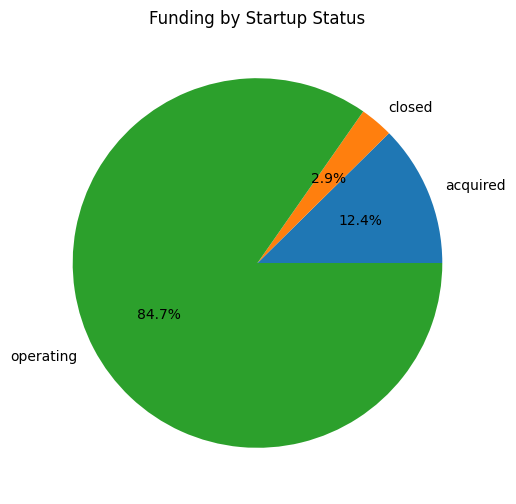

In [ ]:
# Funding distribution by status
status_funding.plot(kind='pie', autopct='%1.1f%%', title="Funding by Startup Status", figsize=(6, 6))
plt.ylabel("")
plt.show()

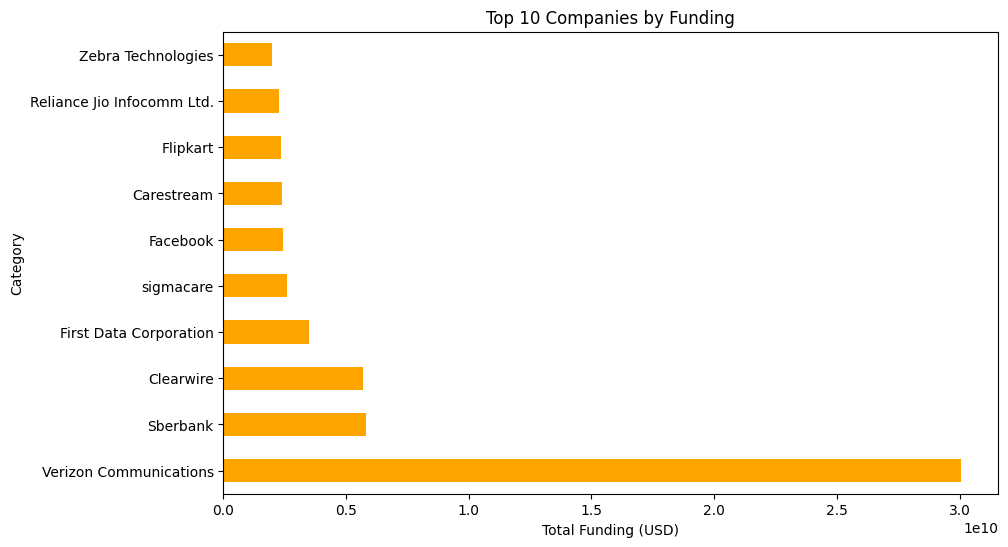

In [ ]:
# Top 10 Companies by funding

Companies_funding.head(10).plot(kind='barh', title="Top 10 Companies by Funding", figsize=(10, 6),color="orange")
plt.xlabel("Total Funding (USD)")
plt.ylabel("Category")
plt.show()


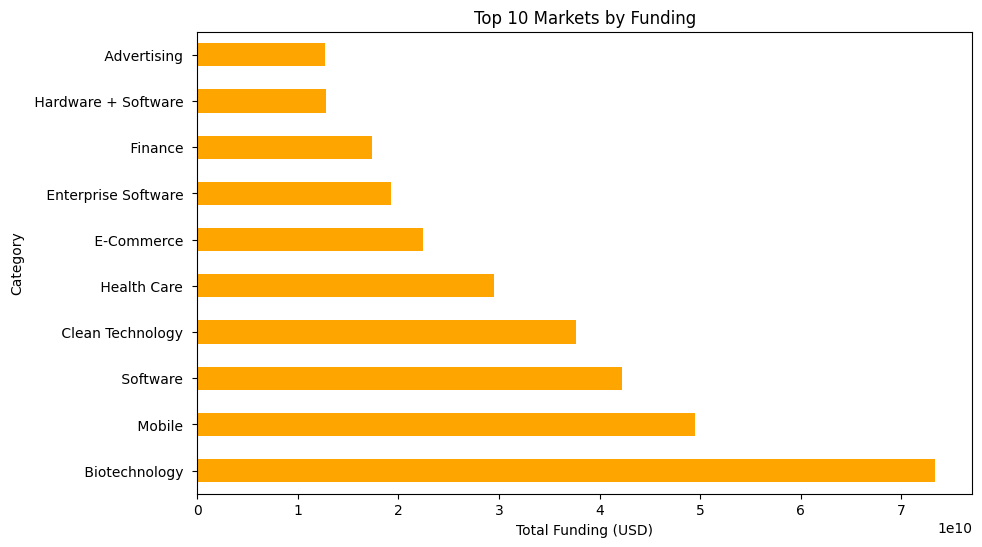

In [ ]:
# Top 10 Markets by funding

Markets_funding.head(10).plot(kind='barh', title="Top 10 Markets by Funding", figsize=(10, 6),color="orange")
plt.xlabel("Total Funding (USD)")
plt.ylabel("Category")
plt.show()

## *Analyze Yearly Trends*

In [ ]:
# Aggregate funding by year and market
time_series = data.groupby(['founded_year', 'market'])['funding_total_usd'].sum().reset_index()


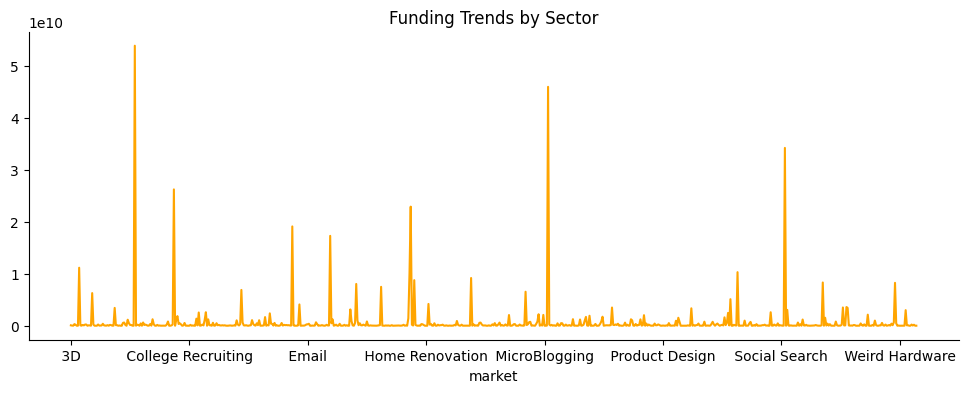

In [ ]:
# Funding Trends by Sector
time_series.groupby('market')['funding_total_usd'].sum().plot(kind='line', figsize=(12, 4), title='Funding Trends by Sector',color="orange")
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Funding over time by year.
data['funding_year'] = data['first_funding_at'].dt.year
yearly_funding = data.groupby('funding_year')['funding_total_usd'].sum()

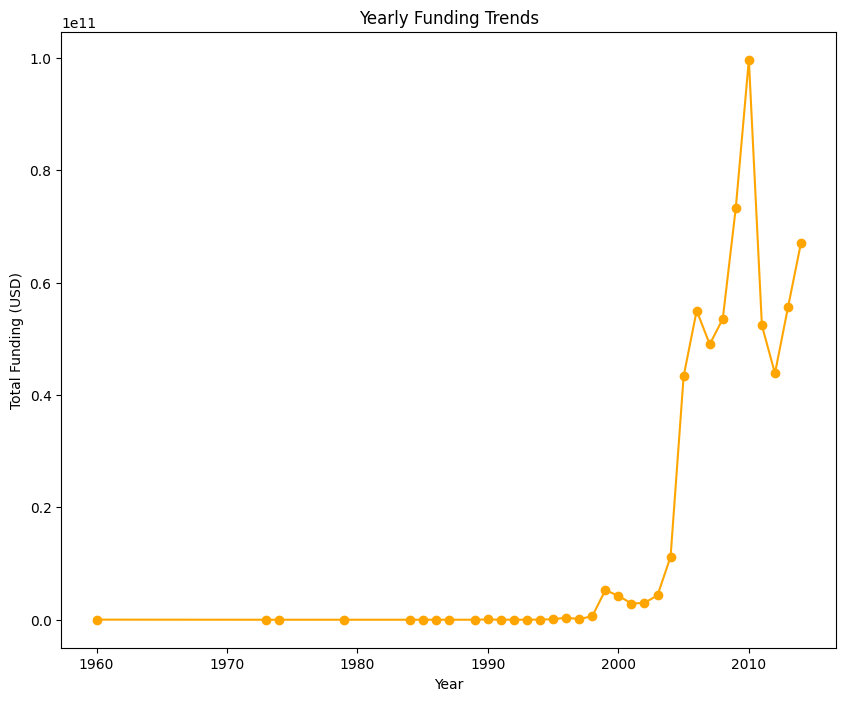

In [ ]:
yearly_funding.plot(kind='line', marker='o', title="Yearly Funding Trends", figsize=(10, 8),color="orange")
plt.xlabel("Year")
plt.ylabel("Total Funding (USD)")
plt.show()


## *Geographic Trends*

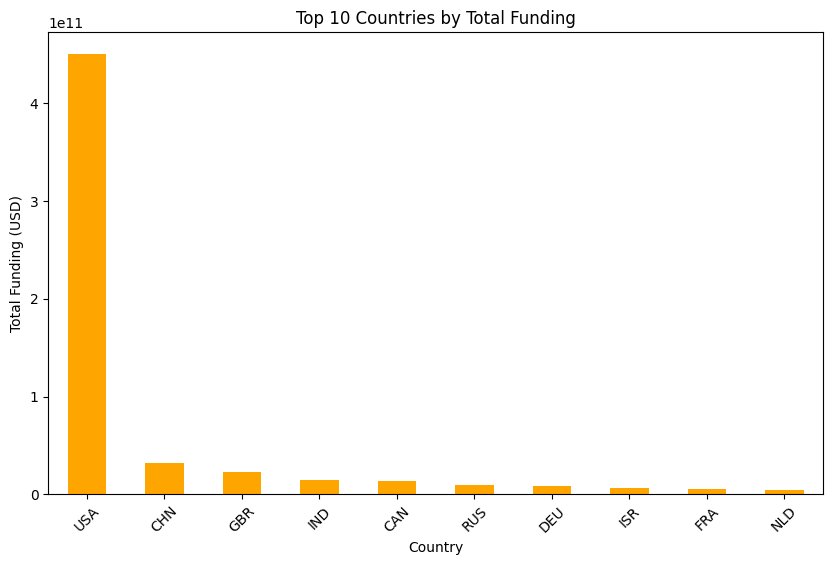

In [ ]:
# Top 10 countries by funding
region_funding.head(10).plot(kind='bar', title="Top 10 Countries by Total Funding", figsize=(10, 6), color="orange")
plt.xlabel("Country")
plt.ylabel("Total Funding (USD)")
plt.xticks(rotation=45)
plt.show()

# **Insights & Recommendations** 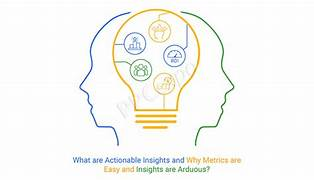



## *Insights*

Based on the cleaned below points identified:
-	The Biotechnology, Mobile, Clean Technology are the Top 3 Categories by funding, it means these are the most funded Categories
-	The Verizon Communications, Sberbank, Clearwire are the Top 3 Companies by funding.
-	We can say that the Biotechnology, Mobile, Software are the Top 3 Markets by funding.
-	Countries wise we can say that in USA More Startups are funded, they more encourage to startups.
- By Focusing on operational startups their significant share of funding suggests investors prioritize ongoing ventures.
- By Monitoring acquisition trends acquisitions highlight successful exits and market consolidation opportunities.
- By Minimizeing exposure to closed startups, The low proportion of funding here signals reduced risk, though it's important to further analyze why some startups fail.
-The venture capital market was still developing, with relatively few large investments. Funding trends reflect the nascent state of the startup ecosystem during this period.
- The late 1990s saw an unprecedented surge in funding during the dot-com boom. Investors were eager to fund technology and internet-based startups, leading to massive capital inflows.
- This period (2001–2009) reflects market adjustment and stabilization, with steady but cautious investments.
- This period (2010–2014) marks the maturation of the startup ecosystem, with increasing capital availability and investor confidence.
- While the USA remains the epicenter of global funding, other countries, particularly China, the UK, and India, show a growing share.
-Known as the "Startup Nation," Israel’s funding reflects its focus on cybersecurity, AI, and defense technologies.
-Germany and France stand out as hubs for automotive tech, clean energy, and AI.
-USA startups received $450.29 billion, significantly higher than any other country, accounting for a majority share.

### *Strategic Allocation of Investments*


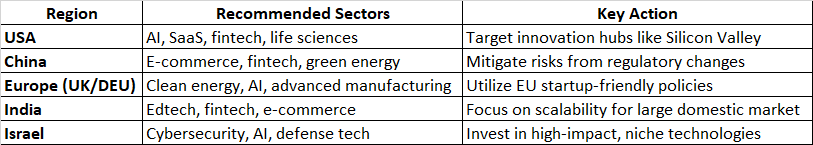

## Recommendations

### For Investors




*   Prioritize Investments in the USA:
 - With $450.29 billion in funding, the USA dominates global startup ecosystems.
 - Sectors like technology (AI, SaaS), fintech, and life sciences are particularly promising.
 - Venture opportunities in emerging markets within the USA (e.g., Midwest, South) could yield high returns.

* Capitalize on China's Growth:
  - China is the second-largest recipient of funding, with $32.08 billion.
  - Focus on sectors like e-commerce, fintech, and green energy, where China's market is rapidly expanding.
  - Be mindful of regulatory changes and government influence in the startup ecosystem.

* Explore European Startups:
  - The UK ($22.77 billion), Germany ($7.99 billion), France ($5.05 billion), and the Netherlands ($4.02 billion) demonstrate strong ecosystems.
  - Invest in clean energy, AI, and advanced manufacturing, areas where European startups excel.
  - Leverage the European Union's favorable policies for cross-border investments.


* Consider Niche Opportunities in Israel:
  - With $6.23 billion in funding, Israel excels in cybersecurity, AI, and defense technologies.
  - Its robust innovation ecosystem makes it ideal for targeted, high-impact investments.

* Focus on Emerging Markets:
  - India ($14.78 billion) and Canada ($13.76 billion) offer high growth potential.
  - In India, prioritize edtech, e-commerce, and fintech startups targeting the large domestic market.
  - In Canada, look for opportunities in AI, health tech, and clean energy.


### For Entrepreneurs

* Leverage Regional Strengths:
  - Startups in the USA and China should capitalize on their respective innovation hubs and large consumer bases.
  - European startups should focus on sustainability, clean energy, and advanced technology sectors to attract funding.

* Position for Global Investors:
  - Entrepreneurs in smaller ecosystems (e.g., Israel, Canada) should emphasize scalability and global market potential to attract international investors.

* Adapt to Market Dynamics:
  - In China and India, entrepreneurs should tailor their offerings to local consumer needs and navigate regulatory landscapes effectively.